In [479]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

In [480]:
# Boston data
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [481]:
# Boston target
pd.DataFrame(Y).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Regularyzacja L1 (Lasso) i L2 (Ridge) dla Regresji Liniowej

## 1. Podział zbioru na uczący i testowy

In [482]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# podział
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

# Weryfikacja podziału
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))
# Wszystko jest dobrze

506
0.7984189723320159
0.2015810276679842


In [483]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.fit(X_test))

StandardScaler()
StandardScaler()


## 2. Regresja liniowa

[]

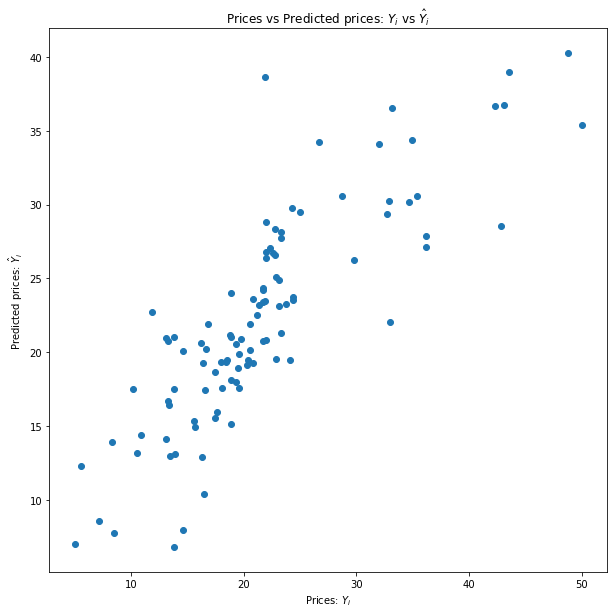

In [484]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot()


## 3. Proszę policzyć Mean Squared Error dla predykcji na zbiorze testowym.

In [485]:
from sklearn.metrics import mean_squared_error

print(f"Mean Squared Error for prediction: {mean_squared_error(y_test,Y_pred)}")

Mean Squared Error for prediction: 23.81224546508056


## 4. Proszę zweryfikować model.score.

In [486]:
# Return the coefficient of determination of the prediction. (for true values of X_test)
print(f'Model Score: {linreg.score(X_test, y_test)}')
# Predykcja średniej jakości - mogło być lepiej

Model Score: 0.6920749038652159


In [487]:
from sklearn.preprocessing import PolynomialFeatures

# Dodanie nieliniowych cech do zbiorów uczącego i testowego
polynomial_features = PolynomialFeatures(degree=2)
pf_train = polynomial_features.fit_transform(X_train,y_train)
pf_test = polynomial_features.fit_transform(X_test, y_test)

In [488]:
linreg2 = LinearRegression().fit(pf_train,y_train)
y_pf_pred = linreg2.predict(pf_test)

In [489]:
print(f'Model Score: {linreg2.score(pf_test, y_test)}')

print(f'MSE: {mean_squared_error(y_test, linreg2.predict(pf_test))}')

# Predykcja jest lepsza niż poprzednio i można ją uznać za całkiem dobrą

Model Score: 0.8652716386093782
MSE: 10.418718229894754


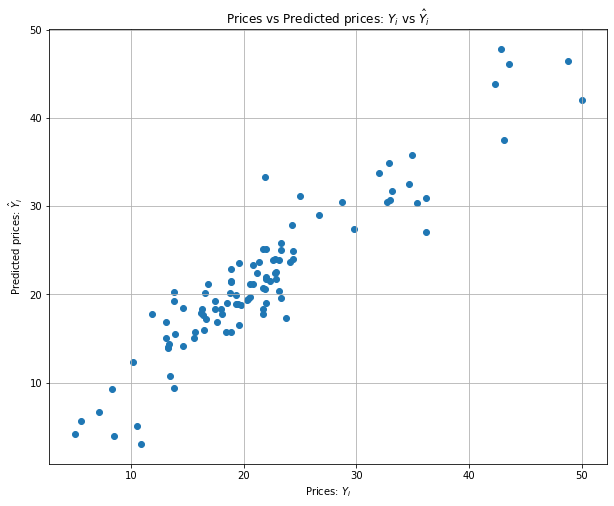

In [490]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pf_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

# Wykres idealnie dopasowanych danych powinien być linią prostą
# Overfitting wystąpiłby, gdybyśmy otrzymali wielomian przechodzący przez większą ilość punktów niż prosta
# A jednocześnie powodujący otrzymanie gorszych wyników niż przy prostej

# Otrzymany wykres jest bliższy prostej niż poprzedni, czyli predykcja jest bardziej dokładna

In [491]:
# import implementacji regresji liniowej z regularyzacją L1 i L2
from sklearn.linear_model import Ridge, Lasso

## 5. Lasso

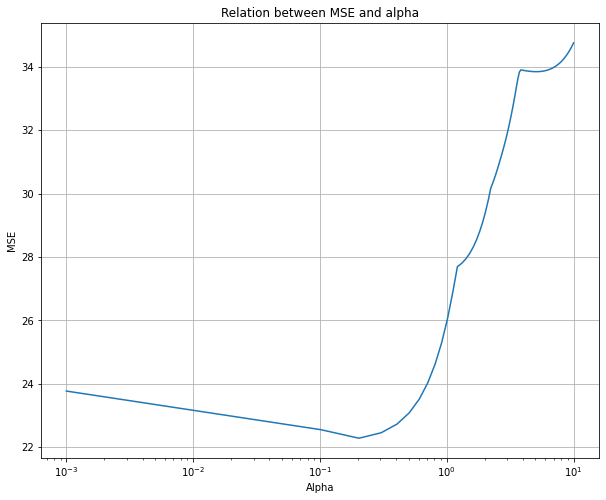

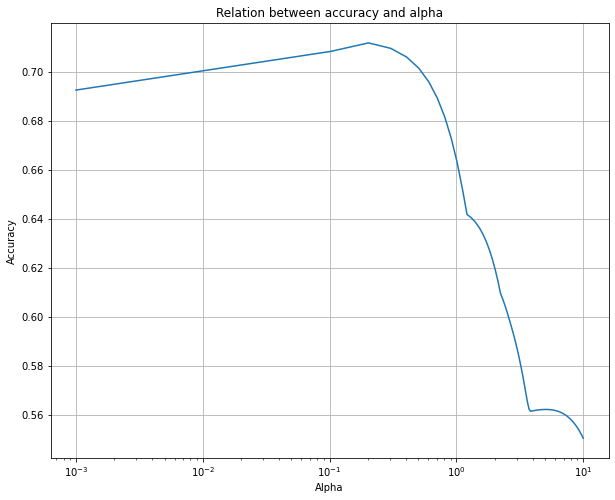

In [492]:
# Trenowanie modelu Lasso o różnych wartościach alpha

alpha = np.linspace(0.001,10,100)
MSE = []
scores = []


for a in alpha:
    las = Lasso(alpha=a).fit(X_train, y_train)
    scores.append(las.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, las.predict(X_test)))

plt.figure(figsize=(10,8))
plt.semilogx(alpha, MSE)
plt.title('Relation between MSE and alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.semilogx(alpha, scores)
plt.title('Relation between accuracy and alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
plt.show()

# Największa dokładność i najmniejsze MSE pomiędzy alpha = 1 oraz alpha = 0.1

## 6. Ridge

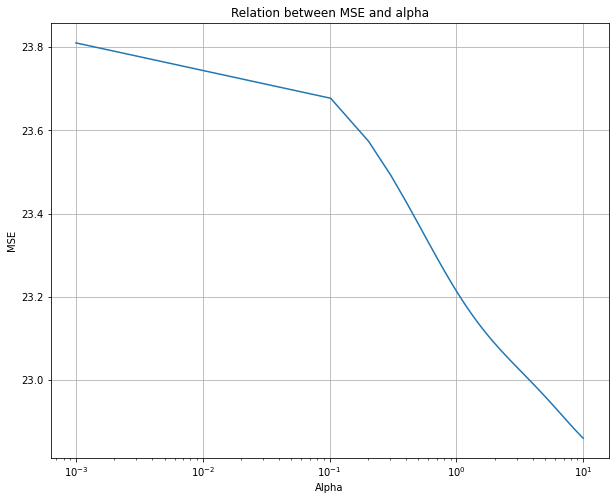

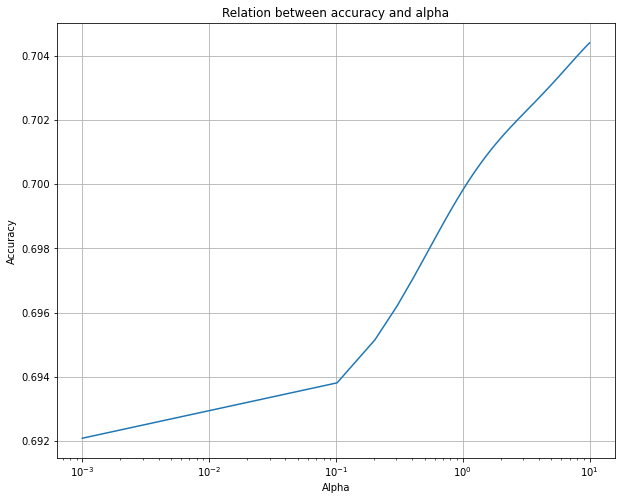

In [493]:
# Trenowanie modelu Ridge o różnych wartościach alpha
alpha = np.linspace(0.001,10,100)
MSE = []
scores = []


for a in alpha:
    las = Ridge(alpha=a).fit(X_train, y_train)
    scores.append(las.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, las.predict(X_test)))


plt.figure(figsize=(10,8))
plt.semilogx(alpha, MSE)
plt.title('Relation between MSE and alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.semilogx(alpha, scores)
plt.title('Relation between accuracy and alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
plt.show()

# Największa dokładność i najmniejsze MSE przy alpha = 10

# Regularyzacja dla Regresji Logistycznej

## Ćwiczenie ze zbiorem A

In [494]:
# Wybrany został zbiór A
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names

X = data.data
y = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [495]:
# Podzielić zbiór na część treningową i część testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

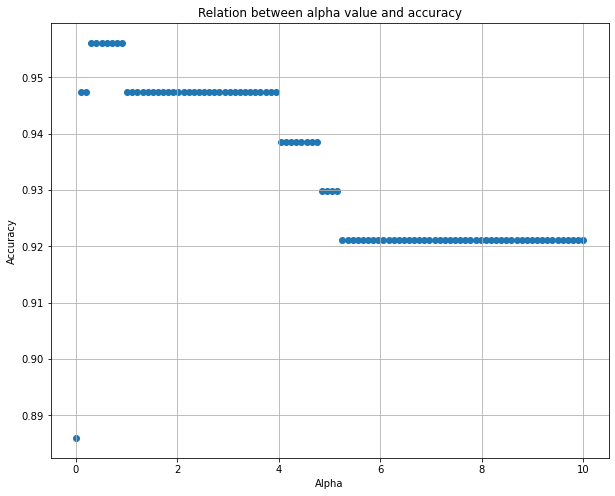

In [496]:
# Trenowanie modlu dla różnych wartości alpha z przedziału [0.0001; 1] dla regularyzacji L2
from sklearn.linear_model import LogisticRegression

alpha = np.linspace(0.001,10,100)
accuracy = []
for a in alpha:
    logreg = LogisticRegression(penalty='l2',C=a).fit(X_train, y_train)
    accuracy.append(logreg.score(X_test, y_test)) # Wyliczanie accuracy

# Wyrysować wykres zależności alfa od accuracy dla każdego z modeli
plt.figure(figsize=(10,8))
plt.scatter(alpha,accuracy)
plt.title('Relation between alpha value and accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
